In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gaussian_process import GaussianProcessRegression
from data import generate_gp

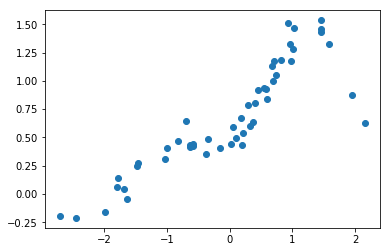

In [3]:
X, y = generate_gp()
plt.plot(X[:,0], y, 'o')

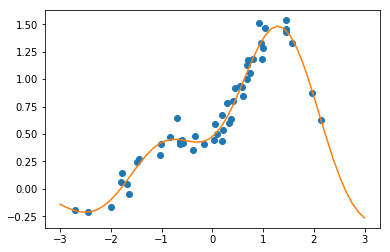

In [4]:
gpr = GaussianProcessRegression()
gpr.fit(X, y)
Xtest = np.linspace(-3, 3).reshape(-1, 1)
ypred = gpr.predict(Xtest)
plt.plot(X[:, 0], y, 'o')
plt.plot(Xtest[:, 0], ypred)